# Heart Disease Prediction - All Classifications Model Classified

We are going to learn about all the classifications alogorithms uses scalability along with percentage of accuracy strength.

We will be going to analyse Heart Diseases Dataset to predict wheather the Patient has certain diseases or not.



In [1]:
# Importing initail library for data exploratory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# importing dataset
df = pd.read_csv("../input/heart-diseases-prediction-classification/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data Contain ;

- age - age in years
- sex - (1 = male; 0 = female)
- cp - The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - esting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
- slope - the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

**As we can clearly see that -Target- is our dependant variable.**

In [4]:
# Let's see the target variable data
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

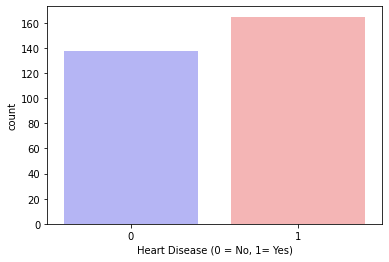

In [5]:
sns.countplot(x = "target", data=df, palette="bwr")
plt.xlabel("Heart Disease (0 = No, 1= Yes)")
plt.show()

In [6]:
# let's see the percentage of the taget value counts
no_disease = len(df[df.target == 0])
have_disease = len(df[df.target == 1])
print("Percentage of Patient Haven't Infected : {:.2f}%".format((no_disease / (len(df.target))*100)))
print("Percentage of Patient has been Infected : {:.2f}%".format((have_disease / (len(df.target))*100)))

Percentage of Patient Haven't Infected : 45.54%
Percentage of Patient has been Infected : 54.46%


In [7]:
df.age.value_counts()[:10]


58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

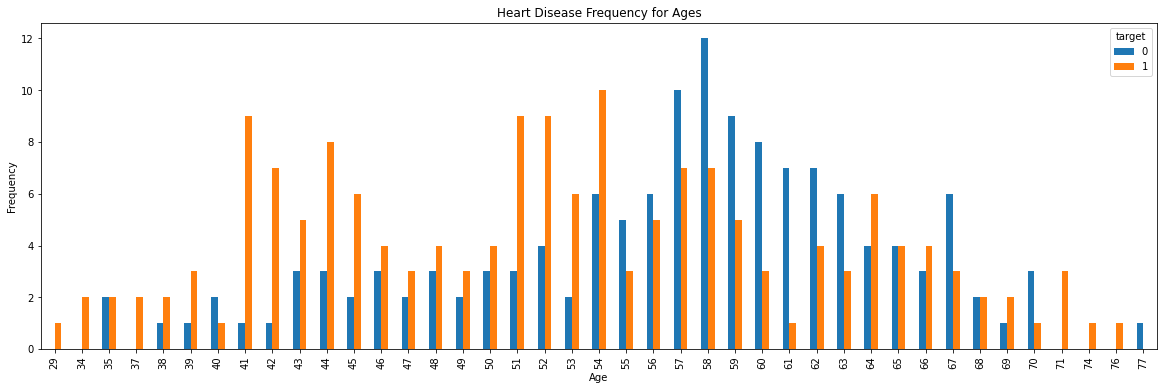

In [8]:
# Let's check the Age of data
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

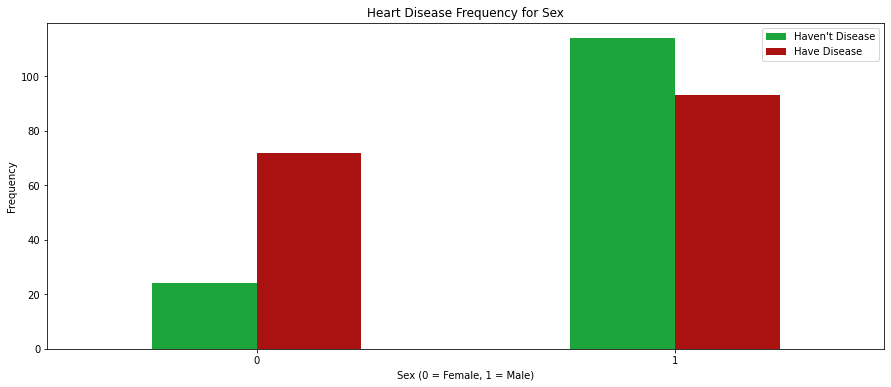

In [9]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

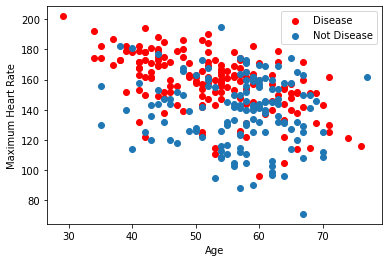

In [10]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [11]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [12]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

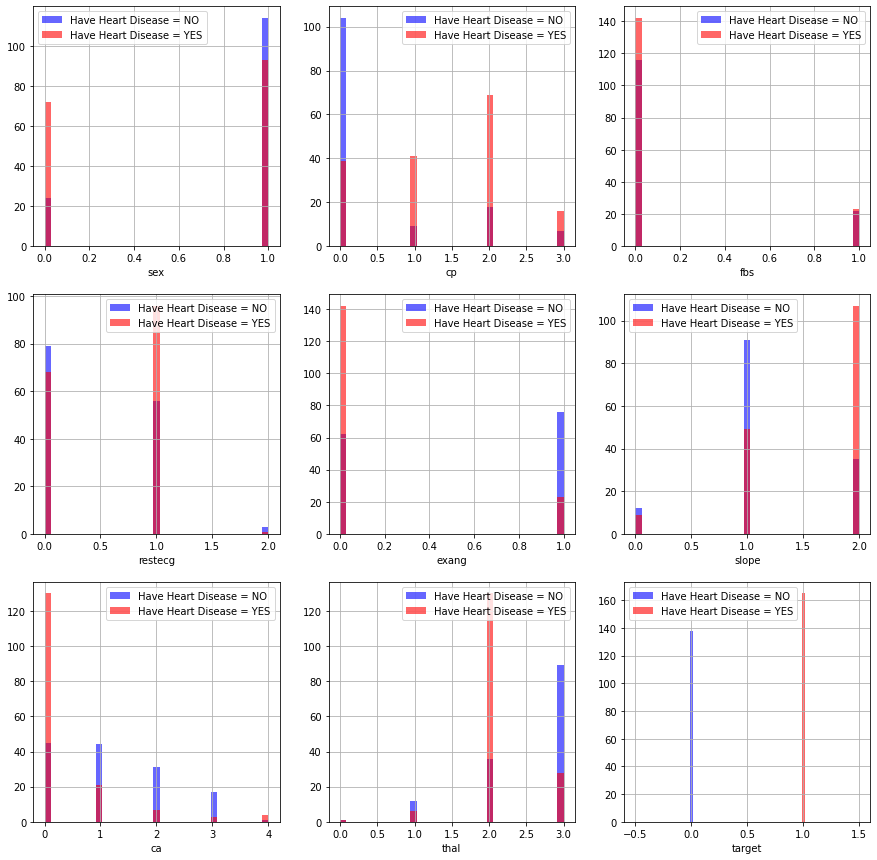

In [13]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
- restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
- exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
- slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
- thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

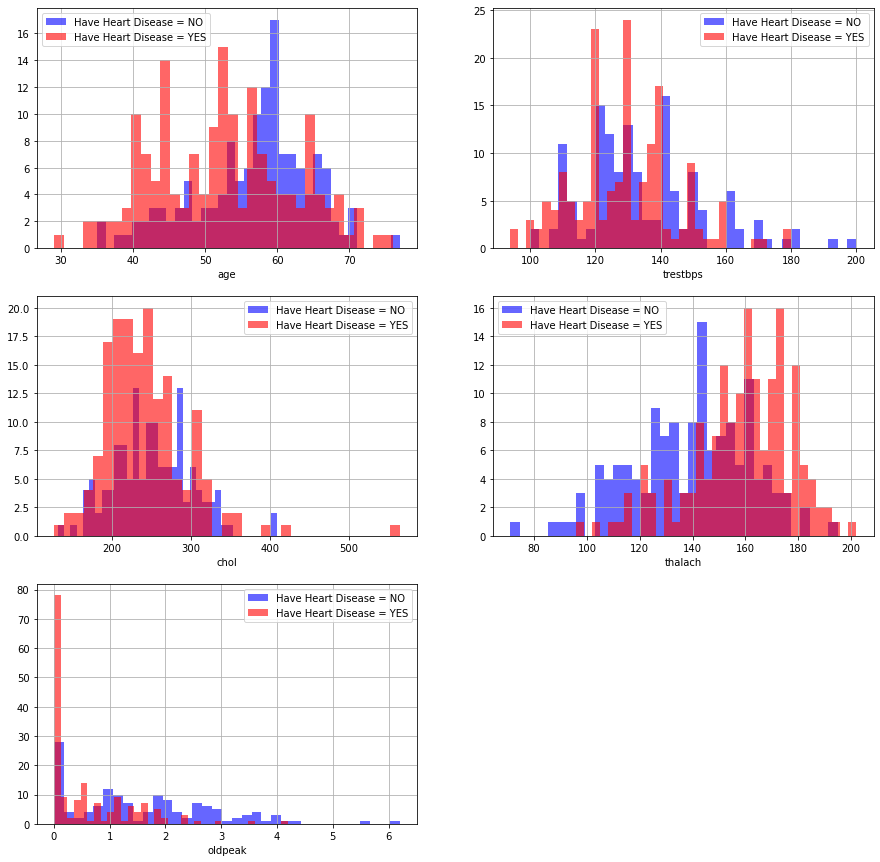

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- chol {serum cholestoral in mg/dl} : above 200 is cause for concern.
- thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
- oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

## Statistics & Null Value

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


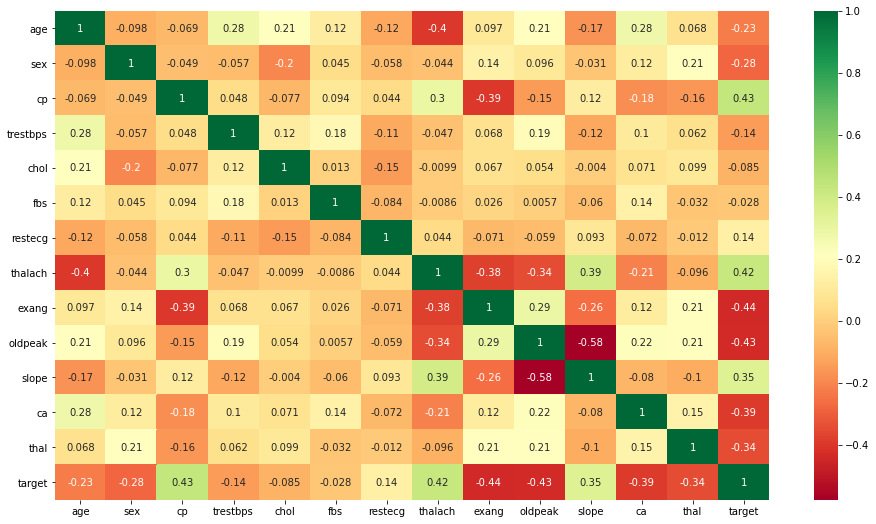

In [16]:
# let's check in heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,9))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [17]:
# Checking null value
df.isnull().sum().sum()

0

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Creating Dummy Variable for categorical variable

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Before creating any other features, firstly copy original dataset into other dataframe
df1 = df.copy()
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df2 = pd.get_dummies(df1, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dummy_na=False, drop_first=True)
df2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Feature Scaling
Let's normalized the imbalaced values of variable

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df2[columns_to_scale] = ss.fit_transform(df2[columns_to_scale])

In [24]:
df2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Split data for Training & Testing

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [25]:
X = df2.drop(['target'], axis=1)
Y = df2.target.values

In [26]:
print(X.shape)
print(Y.shape)

(303, 22)
(303,)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 22)
(61, 22)
(242,)
(61,)


In [29]:
x_test.T

,179,228,111,246,60,9,119,223,268,33,...,255,63,82,236,204,249,104,300,193,184
age,0.290464,0.511041,0.290464,0.180175,1.834507,0.290464,-0.922713,0.180175,-0.040403,-0.040403,...,-1.033002,-1.474158,0.621330,0.400752,0.841908,1.613930,-0.481558,1.503641,0.621330,-0.481558
trestbps,1.049520,2.191778,1.049520,0.135714,-1.234996,1.049520,0.364165,3.905165,-0.549641,-0.378302,...,0.592617,0.192827,-1.691899,-0.378302,1.620649,0.478391,-0.149851,0.706843,0.763956,1.049520
chol,0.574662,0.806568,-2.324160,3.144951,0.362082,-1.512490,-0.063079,0.806568,0.767917,0.516686,...,1.212403,-0.836098,1.386332,1.038474,-1.589792,0.149501,-0.971377,-1.029353,0.690615,-0.063079
thalach,-1.646316,0.409017,1.021244,0.015443,-0.859167,1.064975,0.102904,-0.727976,-1.471394,0.102904,...,-0.115749,-0.771706,0.452748,0.933783,-0.203210,-0.159479,0.583939,-0.378132,-0.334401,-0.946628
oldpeak,-0.379244,-0.724323,-0.724323,0.742260,-0.896862,0.483451,-0.896862,2.553921,1.863764,-0.465514,...,-0.896862,-0.896862,-0.896862,-0.896862,4.451851,0.828529,-0.896862,2.036303,1.518686,1.346147
sex_1,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cp_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cp_2,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
cp_3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fbs_1,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


## Program to Show the Model Accuracy Chart

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression



lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_score = lr_clf.score(x_test,y_test)*100


print("Test Accuracy {:.2f}%".format(lr_score))
print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Test Accuracy 90.16%
Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.873786    0.863309  0.867769    0.868548      0.868028
recall       0.825688    0.902256  0.867769    0.863972      0.867769
f1-score     0.849057    0.882353  0.867769    0.865705      0.867356
support    109.000000  133.000000  0.867769  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.870968   0.933333  0.901639   0.902151      0.903684
recall      0.931034   0.875000  0.901639   0.903017      0.901639
f1-score    0.900000   0.903226  0.901639   0.901613      0.901692
support    29.000000  32.000000  0.901639  61.000000  

In [32]:
y_train.reshape(1,-1)

array([[1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]])

In [33]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
results_df = pd.DataFrame(data=[["Logistic Regression", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df

,Model,Testing Accuracy %
0,Logistic Regression,90.163934


In [34]:
lr_clf.predict(x_test)


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## K-nearest neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 2)
knn_clf.fit(x_train, y_train)
knn_score = knn_clf.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(knn_score))


print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

Test Accuracy 85.25%
Train Result:
Accuracy Score: 88.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.801471    1.000000   0.88843    0.900735      0.910580
recall       1.000000    0.796992   0.88843    0.898496      0.888430
f1-score     0.889796    0.887029   0.88843    0.888413      0.888275
support    109.000000  133.000000   0.88843  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [ 27 106]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.777778   0.960000  0.852459   0.868889      0.873370
recall      0.965517   0.750000  0.852459   0.857759      0.852459
f1-score    0.861538   0.842105  0.852459   0.851822      0.851344
support    29.000000  32.000000  0.852459  61.000000  

In [36]:
test_score = accuracy_score(y_test, knn_clf.predict(x_test)) * 100
results_df2 = pd.DataFrame(data=[["KNeighborsClassifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Testing Accuracy %
0,Logistic Regression,90.163934
1,KNeighborsClassifier,85.245902


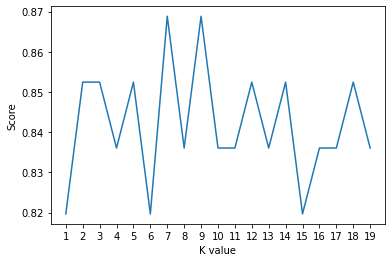

Maximum KNN Score is 86.89%


In [37]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

## Support Vector machine

In [38]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)
svm_score = svm_clf.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(svm_score))

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)


Test Accuracy 86.89%
Train Result:
Accuracy Score: 90.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921569    0.892857  0.904959    0.907213      0.905789
recall       0.862385    0.939850  0.904959    0.901117      0.904959
f1-score     0.890995    0.915751  0.904959    0.903373      0.904601
support    109.000000  133.000000  0.904959  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 94  15]
 [  8 125]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.818182   0.928571  0.868852   0.873377      0.876091
recall      0.931034   0.812500  0.868852   0.871767      0.868852
f1-score    0.870968   0.866667  0.868852   0.868817      0.868711
support    29.000000  32.000000  0.868852  61.000000  

In [39]:
test_score = accuracy_score(y_test, svm_clf.predict(x_test)) * 100
results_df2 = pd.DataFrame(data=[["Support Vector Machine", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Testing Accuracy %
0,Logistic Regression,90.163934
1,KNeighborsClassifier,85.245902
2,Support Vector Machine,86.885246


## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
tree_score  = tree_clf .score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(tree_score ))

print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)


Test Accuracy 72.13%
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 72.13%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.676471   0.777778  0.721311   0.727124      0.729615
recall      0.793103   0.656250  0.721311   0.724677      0.721311
f1-score    0.730159   0.711864  0.721311   0.721012      0.720562
support    29.000000  32.000000  0.721311  61.000000     61.000000
_________________________________________

In [41]:
test_score = accuracy_score(y_test, tree_clf.predict(x_test)) * 100
results_df2 = pd.DataFrame(data=[["Decision Tree Classifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Testing Accuracy %
0,Logistic Regression,90.163934
1,KNeighborsClassifier,85.245902
2,Support Vector Machine,86.885246
3,Decision Tree Classifier,72.131148


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(x_train, y_train)
rf_score  = rf_clf.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(rf_score ))

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Test Accuracy 85.25%
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.812500   0.896552  0.852459   0.854526      0.856593
recall      0.896552   0.812500  0.852459   0.854526      0.852459
f1-score    0.852459   0.852459  0.852459   0.852459      0.852459
support    29.000000  32.000000  0.852459  61.000000     61.000000
_________________________________________

In [43]:
test_score = accuracy_score(y_test, rf_clf.predict(x_test)) * 100
results_df2 = pd.DataFrame(data=[["Random Forest Classifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Testing Accuracy %
0,Logistic Regression,90.163934
1,KNeighborsClassifier,85.245902
2,Support Vector Machine,86.885246
3,Decision Tree Classifier,72.131148
4,Random Forest Classifier,85.245902


## XGBoost Classifer

In [44]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
xgb_score  = xgb_clf.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(xgb_score ))

print_score(xgb_clf, x_train, y_train, x_test, y_test, train=True)
print_score(xgb_clf, x_train, y_train, x_test, y_test, train=False)

Test Accuracy 83.61%
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.787879   0.892857  0.836066   0.840368      0.842949
recall      0.896552   0.781250  0.836066   0.838901      0.836066
f1-score    0.838710   0.833333  0.836066   0.836022      0.835889
support    29.000000  32.000000  0.836066  61.000000     61.000000
_________________________________________

In [45]:
test_score = accuracy_score(y_test, nb.predict(x_test)) * 100
results_df2 = pd.DataFrame(data=[["XGB Classifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

NameError: name 'nb' is not defined

## Naive Bayes Algorithm

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

nb_score = nb.score(x_test,y_test)*100
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_score))

print_score(nb, x_train, y_train, x_test, y_test, train=True)
print_score(nb, x_train, y_train, x_test, y_test, train=False)

Accuracy of Naive Bayes: 65.57%
Train Result:
Accuracy Score: 71.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.612717    0.956522  0.710744    0.784619      0.801667
recall       0.972477    0.496241  0.710744    0.734359      0.710744
f1-score     0.751773    0.653465  0.710744    0.702619      0.697744
support    109.000000  133.000000  0.710744  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[106   3]
 [ 67  66]]

Test Result:
Accuracy Score: 65.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.586957   0.866667  0.655738   0.726812      0.733690
recall      0.931034   0.406250  0.655738   0.668642      0.655738
f1-score    0.720000   0.553191  0.655738   0.636596      0.632494
support    29.000000  32.000000  0.655738  

In [47]:
test_score = accuracy_score(y_test, nb.predict(x_test)) * 100
results_df2 = pd.DataFrame(data=[["Naive Bias Classifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Testing Accuracy %
0,Logistic Regression,90.163934
1,KNeighborsClassifier,85.245902
2,Support Vector Machine,86.885246
3,Decision Tree Classifier,72.131148
4,Random Forest Classifier,85.245902
5,Naive Bias Classifier,65.573770


## Comparison Model

TypeError: float() argument must be a string or a number, not 'LogisticRegression'

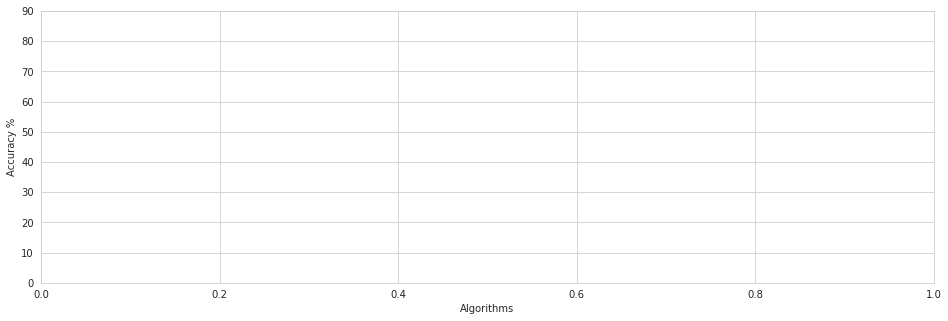

In [48]:
accuracies = {}
accuracies['Logistic Regression'] = lr_clf
accuracies['KNeighbors Classifier'] = knn_clf
accuracies['Support Vector Machine'] = svm_clf 
accuracies['Decision Tree'] = tree_clf
accuracies['Random Forest'] = rf_clf 
accuracies['XGB Classifier'] = xgb_clf
accuracies['Naive Bayes'] = nb

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","red"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [49]:
# Predicted values
y_head_lr = lr_clf.predict(x_test)
y_head_knn = knn_clf.predict(x_test)
y_head_svm = svm_clf.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = tree_clf.predict(x_test)
y_head_rf =  rf_clf.predict(x_test)
y_head_XGB =  xgb_clf.predict(x_test)


In [50]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_xgb = confusion_matrix(y_test,y_head_XGB)

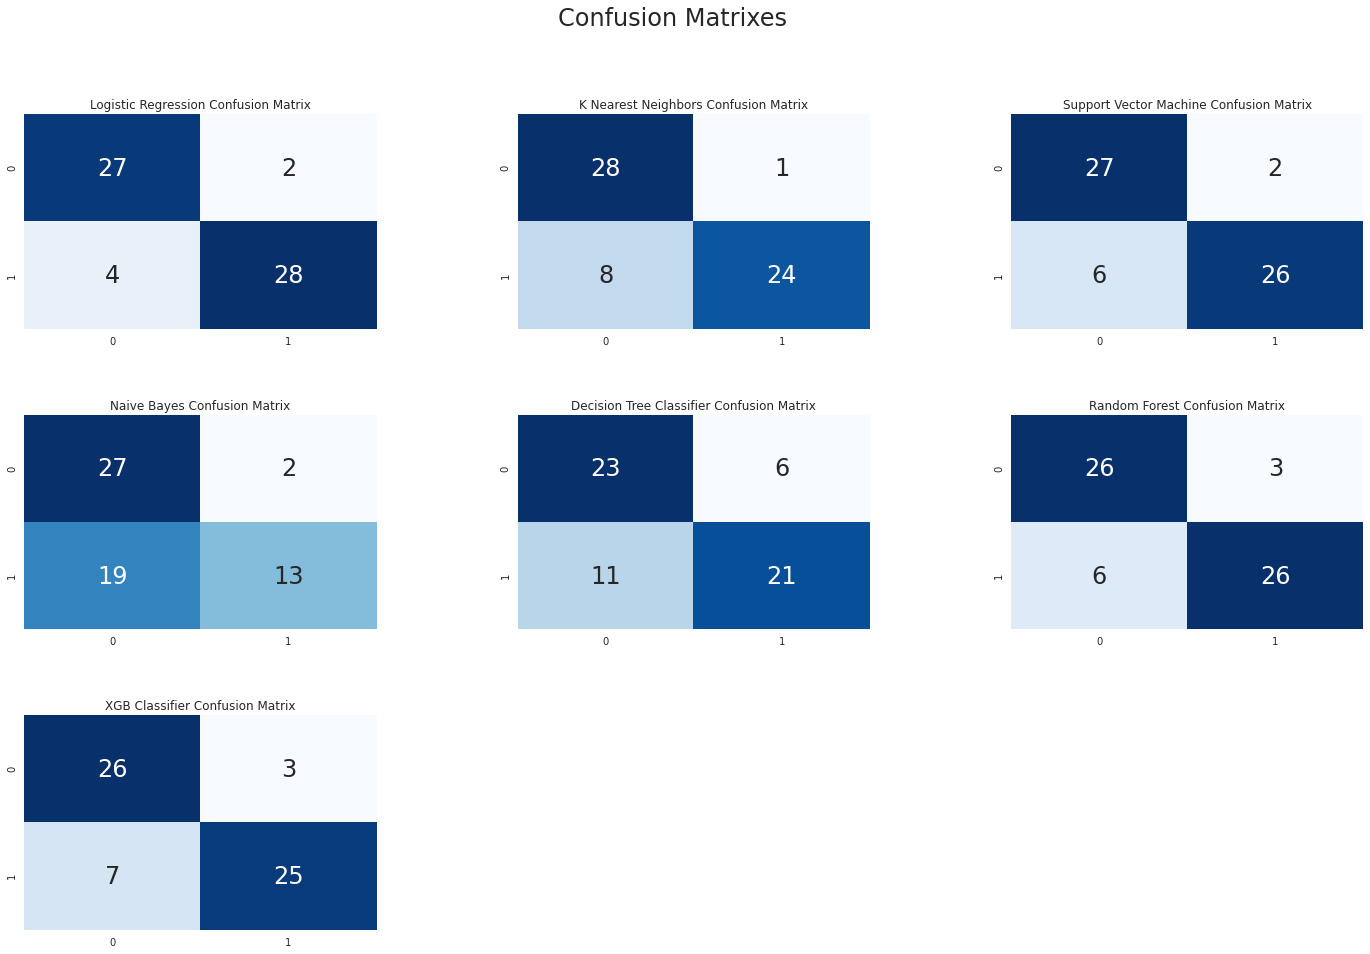

In [51]:
plt.figure(figsize=(24,15))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("XGB Classifier Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

